In [59]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
base_url = '/content/drive/My Drive/CVIT_WORKSHOP_2020/Day5'

In [0]:
def histogram(I):
  fig = go.Figure()
  if len(I.shape) == 2:
    fig.add_trace(go.Histogram(x=I.ravel()))
    return fig
  for i in range(I.shape[2]):
    fig.add_trace(go.Histogram(x=I[:, :, i].ravel(), name= 'Channel: ' + str(i)))
  return fig

## **Session 1**
## Probability & Statistics

### **Programming Exercise: Robot Localization**


#### Cancer Test Example
Let us apply Bayes' Rule to a Cancer Test Example which is a very common example in Statistic classes.
Suppose, there is a certain type of cancer which is extremely rare.

Let,
\begin{equation}
P(C) = 0.001
\end{equation}
In other words, $1$ in every $1000$ people has this cancer. Can you compute the probability of not having cancer?
\begin{equation}
P(\neg C) = ?
\end{equation}

The test for cancer is not $100\%$ accurate. Let us say, probability of the test being positive given someone has cancer is,
\begin{equation}
P(pos | C) = 0.8
\end{equation}
Can you compute the probability that the test is negative given someone has cancer?
\begin{equation}
P(neg | C) = ?
\end{equation}

Similarly, the probability of a test being positive given that someone has no cancer is $P(pos | \neg C) = 0.1$. Can you compute the probability that the test is negative given someone has no cancer?
\begin{equation}
P(neg | \neg C) = ?
\end{equation}

Can you compute the following?
\begin{equation}
P(C | pos) = ?
\end{equation}
Interpret the quantity you computed in words!

What we computed is very interesting. We computed probability of having cancer given the test results and how likely the disease is.

# Robot Localization
In this exercise we will apply basic concepts of probability and statistics to help a robot localise itself. Robot localization is an important task for any mobile robot as it needs to know where in the world it is currently situated in.

You may think robot localization is a very easy problem as you can use GPS. But no! GPS has errors in localization upto a few metres which is very inaccurate for self driving cars.

Hence, the robot needs to use sensors to locate itself. And sensors are noisy! Even the motion of a robot is uncertain.

For the purposes of this exercise, let us assume that the world is a one dimensional world with $N$ grid cells. Each grid cell is colored either red or green which can be measured using a sensor located in the robot. However, the sensor measurements are noisy and hence we need to take a probabilitic approach to determine in which of these grid cells the robot is situated in at a given instant of time.

![image](images/1.png)

The robot can move either left or right in this **cyclic** world. This motion is uncertain as well prompting us again to take a probabilistic approach. For example you may instruct the robot to move $5$ cells. But it may move $4/6$ cells due to a wheel slip.

When the robot is switched on, it is in a state of maximum confusion. It doesn't know where it is situated. We will model this state of maximum confusion as uniform distribution. 
In other words, the robot has equal belief of being present in any of the cells.

Complete the below function to return an array where the $i^{th}$ array element is the probability that the robot is in the $i^{th}$ grid cell at time instant $0$ when the robot is switched on.

In [0]:
# Modify the empty list, p, so that it becomes a UNIFORM probability
# distribution over n grid cells, as expressed in a list of 
# n probabilities.
def init_distribution(n):
    p = [1 / n for i in range(n)]
    return p

In [63]:
init_distribution(5)

[0.2, 0.2, 0.2, 0.2, 0.2]

In [64]:
#Modify the code below so that the function sense, which 
#takes p and Z as inputs, will output the normalized 
#probability distribution, q, after multiplying the entries 
# in p according to the color in the corresponding cell in world,
# followed by normalization of the probability values
world=['green', 'red', 'red', 'green', 'green']
p = [0.2, 0.2, 0.2, 0.2, 0.2]

def sense(p, Z):
    q = []
    for i in range(len(p)):
      if world[i] == Z:
        q.append(p[i] * 0.75)
      else:
        q.append(p[i] * 0.25)
    norm = sum(q)
    for i in range(len(p)):
      q[i] /= norm
    return q
            
sense(p, 'red')

[0.11111111111111112,
 0.33333333333333337,
 0.33333333333333337,
 0.11111111111111112,
 0.11111111111111112]

In [65]:
sense(p, 'green')

[0.27272727272727276,
 0.09090909090909091,
 0.09090909090909091,
 0.27272727272727276,
 0.27272727272727276]

In [66]:
#Modify the code so that it updates the probability twice
#and gives the posterior distribution after both 
#measurements are incorporated. Make sure that your code 
#allows for any sequence of measurement of any length.

# DO NOT MODIFY THE SENSE FUNCTION. JUST CALL THE SENSE FUNCTION APPROPRIATELY

p=[0.2, 0.2, 0.2, 0.2, 0.2]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']

for Z in measurements:
  p = sense(p, Z)
print(p)

[0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998]


In [67]:
#Program a function that returns a new distribution 
#q, shifted to the right by U units. If U=0, q should 
#be the same as p.

def move(p, U):
  U %= len(p)
  U = (U + len(p)) % len(p)
  q = [0 for i in range(len(p))]
  for i in range(len(p)):
    q[(i + U) % len(p)] = p[i]
  return q

move([0.11, 0.33, 0.33, 0.11, 0.11], -1)

[0.33, 0.33, 0.11, 0.11, 0.11]

**Solution:**

We can apply the Theorem of total probability at each grid cell given the robot instruction. For example, we are interested in computing the probability that the robot is at grid cell $2$. Now the robot can come here from the following gird cells:
- Grid cell $1$: The instruction is to move right by $2$, and hence a robot at cell $1$ can reach this grid cell with a probability of $0.1$(this is by undershooting)
- Grid cell $0$ : The instruction is to move right by $2$, and hence a robot at cell $0$ can reach this grid cell with a probability of $0.8$(this is case when robot motion is exact)
- Grid cell $4$ : The instruction is to move right by $2$, and hence a robot at cell $4$ can reach this grid cell with a probability of $0.1$(this is by overshooting). Remember that the world is cyclic.

Required Probability($P$) is given as follows:
\begin{equation}
P = 1.0 * 0.1 + 0.0 * 0.8 + 0.0 * 0.1 = 0.1
\end{equation}

In [68]:
#Modify the move function to accommodate the added 
#probabilities of overshooting or undershooting 
#the intended destination.

def getIndex(i, l):
  i %= l
  i = (i + l) %l
  return i

def move(p, U):
    l = len(p)
    q = [0 for i in range(l)]
    for i in range(l):
      q[i] = p[getIndex(i-U-1, l)] * 0.1 + p[getIndex(i-U, l)] * 0.8 + p[getIndex(i-U+1, l)] * 0.1
    return q

move([0, 1.0, 0, 0, 0], 1)

[0.0, 0.1, 0.8, 0.1, 0.0]

In [69]:
# Write code that makes the robot move twice and then prints 
# out the resulting distribution, starting with the initial 
# distribution p = [0, 1, 0, 0, 0]
p = [0, 1, 0 , 0, 0]
p = move(p, 1)
p = move(p, 1)
p

[0.010000000000000002,
 0.010000000000000002,
 0.16000000000000003,
 0.6600000000000001,
 0.16000000000000003]

In [70]:
#write code that moves 1000 times and then prints the 
#resulting probability distribution.

p = [0, 1, 0, 0, 0]
for i in range(1000):
  p = move(p, 1)
p

[0.20000000000000365,
 0.20000000000000373,
 0.20000000000000365,
 0.2000000000000035,
 0.2000000000000035]

In [71]:
#Given the list motions=[1,1] which means the robot 
#moves right and then right again, compute the posterior 
#distribution if the robot first senses red, then moves 
#right one, then senses green, then moves right again, 
#starting with a uniform prior distribution.

world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
motions = [1,1]

p = init_distribution(len(world))
for i in range(len(motions)):
  p = sense(p, measurements[i])
  p = move(p, motions[i])
p

[0.21157894736842106,
 0.15157894736842106,
 0.08105263157894738,
 0.16842105263157894,
 0.38736842105263164]

## **Session 2**
## Introduction to Machine Learning & Pytorch

In [72]:
# Installation 
!pip3 install torch torchvision 

In [0]:
import torch
from torch import nn, optim
from matplotlib import pyplot
SMALL_SIZE = 18
MEDIUM_4IZE = 20
BIGGER_SIZE = 24

pyplot.rc('font', size=SMALL_SIZE)          # controls default text sizes
pyplot.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
pyplot.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
pyplot.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pyplot.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pyplot.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
pyplot.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [107]:
A = torch.Tensor([1, 2, 3])
A

tensor([1., 2., 3.])

In [120]:
B = A + 3 # Supports broadcast operations, like numpy.
B

tensor([4., 5., 6.])

## 2.1 Why `torch.Tensor`?

* `autograd` enabled. No longer necessary to compute gradient update rules manually.
* CUDA backend - operations are many orders faster than numpy, which is not as fast.

## Today's excercise

Create a 2D synthetic data (Normal distribution) of 1000 samples  (i.e.,
$(x^1,x^2)$ from two classes with 50% in each of these classes.

You may chose your favorite mean and covariance. But make sure that a
linear classifier will have error (say the best possible error is in the
range 50-250 samples. (your data and parameter will differ from your
friends data!!).

...



![](https://www.mathworks.com/help/stats/machinelearning_supervisedunsupervised.png)



## 2.2 `torch.utils.data.Dataset`

We'll implement the 2D data in question as a `Dataset`. 

A dataset is something which requires a finite length, and indexed access gets a `(sample, target)` pair.

In [0]:
from torch.distributions.multivariate_normal import MultivariateNormal
import torch.utils.data

class FakeDataset(torch.utils.data.Dataset):
    def __init__(self, mean, covariance, class_id, samples):
        self.distribution = MultivariateNormal(mean, covariance)
        self.class_id = class_id
        self.samples = samples
        self.mean = mean
        self.covariance = covariance
        
        self.data = self.generate_samples()
    
    def generate_samples(self):
        data = []
        for i in range(self.samples):
            sample = self.distribution.sample()
            data.append(sample)
        return data
    
    def __len__(self):
        return self.samples
    
     
    def __getitem__(self, idx):
        return (self.data[idx], self.class_id)

In [0]:
samples = 500

mean, covariance = torch.tensor([1, 1]).float(), torch.eye(2, 2).float()
first = FakeDataset(mean, covariance, class_id=0, samples=samples)

mean, covariance = torch.tensor([3, 3]).float(), torch.eye(2, 2).float()
second = FakeDataset(mean, covariance, class_id=1, samples=samples)

\begin{align*}
\mu_0 &= \begin{bmatrix} 1 \\ 1\end{bmatrix} & \Sigma_0 &= \begin{bmatrix}1 & 0 \\0 &1 \end{bmatrix} & \text{# class 0} \\
\mu_1 &= \begin{bmatrix} 3 \\ 3\end{bmatrix} & \Sigma_1 &= \begin{bmatrix}1 & 0 \\0 &1 \end{bmatrix} & \text{# class 1}
\end{align*}



## 2.3 `torch.utils.data.DataLoader`

A `DataLoader` is an abstraction which enables fast and parallel loading of data (images, videos etc) and provides options for batching, shuffling and splitting the `Dataset`. 

`Transforms` additionally help in preprocessing data (feature extraction) which are also built into the dataloader. 

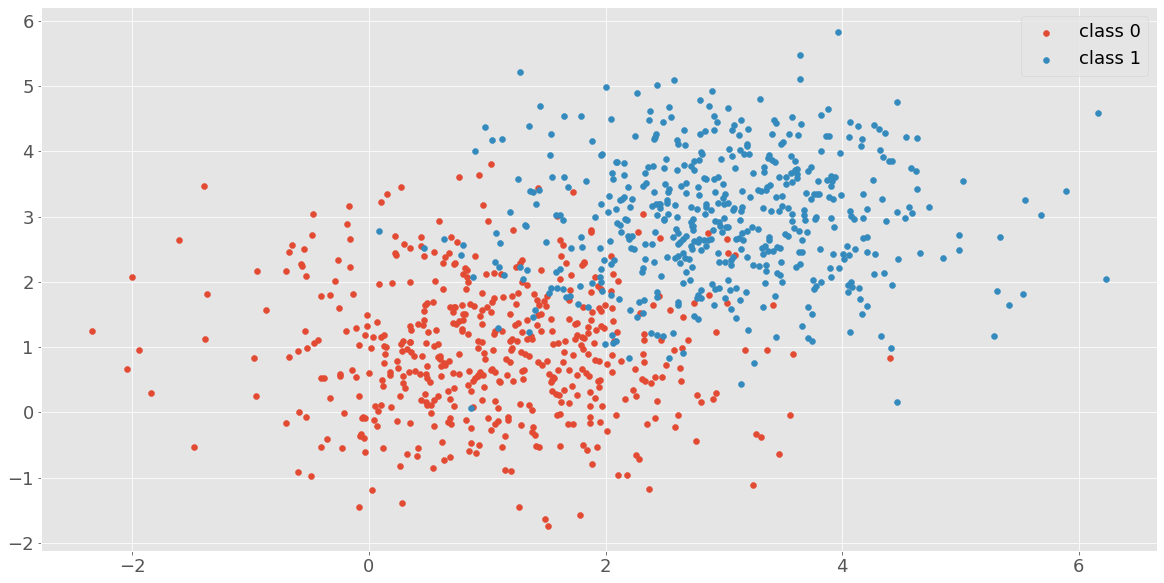

In [111]:
dataset = torch.utils.data.ConcatDataset([first, second])
loader = torch.utils.data.DataLoader(dataset, shuffle=True)

def visualize_datapoints(first, second, boundaries=[]):
    def datapoints(dset):
        loader = torch.utils.data.DataLoader(dset, batch_size=len(dset))
        pts, labels = next(iter(loader))
        xys = pts.numpy()
        xs, ys = xys[:, 0], xys[:, 1]
        return (xs, ys)
        
    xs, ys = datapoints(first)
    pyplot.figure(figsize=(20, 10))
    pyplot.scatter(xs, ys, label='class 0')
    
    xs, ys = datapoints(second)
    pyplot.scatter(xs, ys, label='class 1')
    
    def draw(boundary):
        w, title  = boundary
        eps = 1e-9
        f = lambda x: -(w[0] + w[1]*x)/(w[2] + eps)
        xs = torch.linspace(start=-1, end=+5, steps=100)
        ys = f(xs)
        pyplot.plot(xs.numpy(), ys.numpy(), label=title)
    for boundary in boundaries:
        draw(boundary)
    
    pyplot.legend()
    return pyplot

_ = visualize_datapoints(first, second)

## 2.4 Model 

Learn a Linear classifier with gradient descent. Find the
error on this data. (write your own code that implements gradient
descent. also submit the code). Repeat this with bias and without bias.
Do you find any difference?

Plot the decision boundaries (Bayesian optimal, LR with bias, LR without
bias) on a 2D plane and Submit. (show samples from different classes
with different colour.)
...

In [0]:
class MultinomialLogisticRegressor(nn.Module):
    def __init__(self, input_feature_dim,  output_classes, bias=True):
        super().__init__()
        self.input_feature_dim = input_feature_dim
        self.output_classes = output_classes        
        self.W1 = nn.Linear(input_feature_dim, output_classes, bias=bias)
        self.W2 = nn.Linear(input_feature_dim, output_classes, bias=bias)



    def forward(self, input_feature):
        o = input_feature
        o = self.W1(o).tanh()
        o = self.W2(o)
        return o

In [113]:
print(MultinomialLogisticRegressor(10,2))

MultinomialLogisticRegressor(
  (W1): Linear(in_features=10, out_features=2, bias=True)
  (W2): Linear(in_features=10, out_features=2, bias=True)
)


In [0]:
def run_epoch(loader, model, criterion, opt, device):
    total_loss, total_count = 0, 0
    
    model = model.to(device)
    for sample, target in loader:
        
        sample = sample.to(device)
        target = target.to(device)
        
        opt.zero_grad()   
        
        prediction = model(sample)
        loss = criterion(prediction, target)
        loss.backward()
        
        opt.step()
        
        total_loss += loss.item()
        total_count += 1
        
    return total_loss/total_count

## 2.5 Gradient Updates: Explained

![](https://golden-media.s3.amazonaws.com/topic_images/48553e73ec8047d0a0739c8cd98b61f3.png)_


Before any computation, we clear out the existing gradients through `opt.zero_grad()`.

```python
for sample, target in loader:
    opt.zero_grad()   
```

The forward pass happens below.

```python
    prediction = model(sample)
```


Gradients for each parameter `x` are stored as an attribute, `x.grad`.

```python
    loss = criterion(prediction, target)
    loss.backward()
```

Now, all the optimizer has to do is visit each parameter and `x = x - eta * x.grad`. Which is achieved through the following function.


```python
    opt.step()
```

## Resources

Basic implementations which helps see how autograd is implemented can be found in the below notebook.

[CS 231 Lecture-4](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture4.pdf)


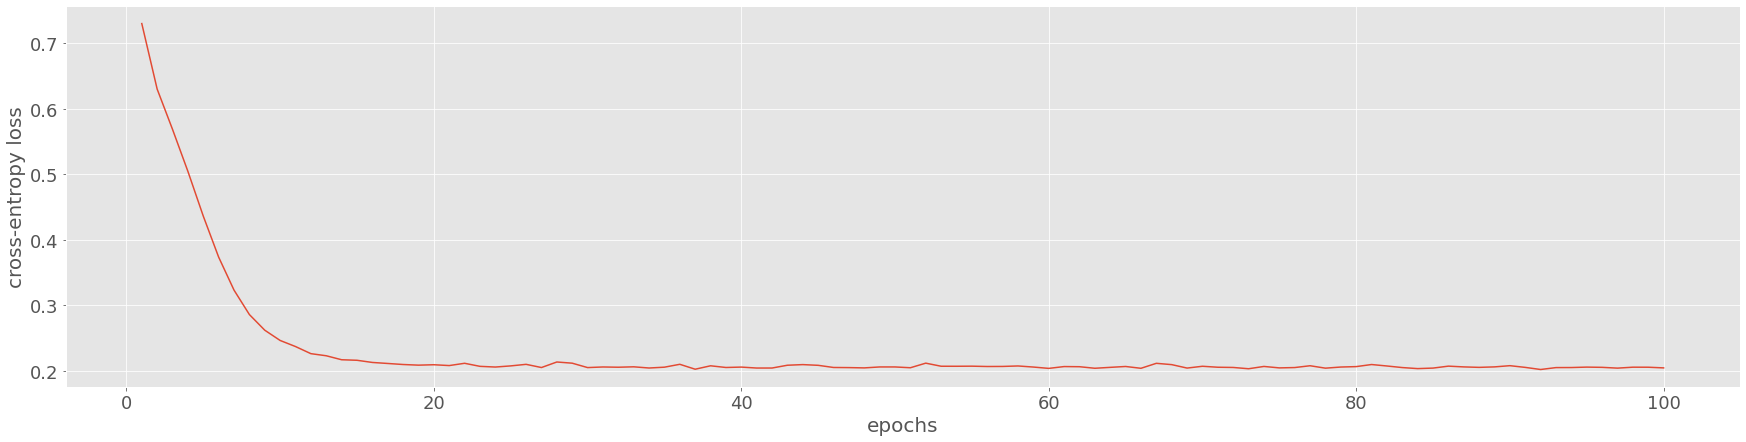

In [115]:
model = MultinomialLogisticRegressor(input_feature_dim=2, output_classes=2)
criterion = torch.nn.CrossEntropyLoss()
opt = torch.optim.SGD(model.parameters(),  lr=1e-2, momentum=0.8)
max_epochs = 100


def train(max_epochs, loader, model, criterion, opt, device):
    losses = []
    for epoch in range(max_epochs):
        loss = run_epoch(loader, model, criterion, opt, device)
        losses.append(loss)
    return losses

# device = torch.device("cuda")
device = torch.device("cpu")
loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=25)
losses = train(max_epochs, loader, model, criterion, opt, device)

def loss_plot(losses):
    max_epochs = len(losses)
    times = list(range(1, max_epochs+1))
    pyplot.figure(figsize=(30, 7))
    pyplot.xlabel("epochs")
    pyplot.ylabel("cross-entropy loss")
    return pyplot.plot(times, losses)

_ = loss_plot(losses)



We know that the probability for the two classes are given by the below functions.

\begin{align*}
f(0, x) &= {\bf \theta}_0^T{\bf x} & g(0, {\bf x}) &= (1 + \exp( f(0, {\bf x}) )^{-1} \\
f(1, x) &= {\bf \theta}_1^T{\bf x} & g(1, {\bf x}) &= (1 + \exp( f(1, {\bf x}) )^{-1} \\
\end{align*}

Decision boundary is given by $g(0, x) = g(1, x)$, which leads to $f(0, x) = f(1, x)$.

i.e, 
\begin{align*}
f(0, x) - f(1, x) &= 0 \implies & ({\bf \theta}_0 - {\bf \theta}_1)^T{\bf x} &= 0 
\end{align*}

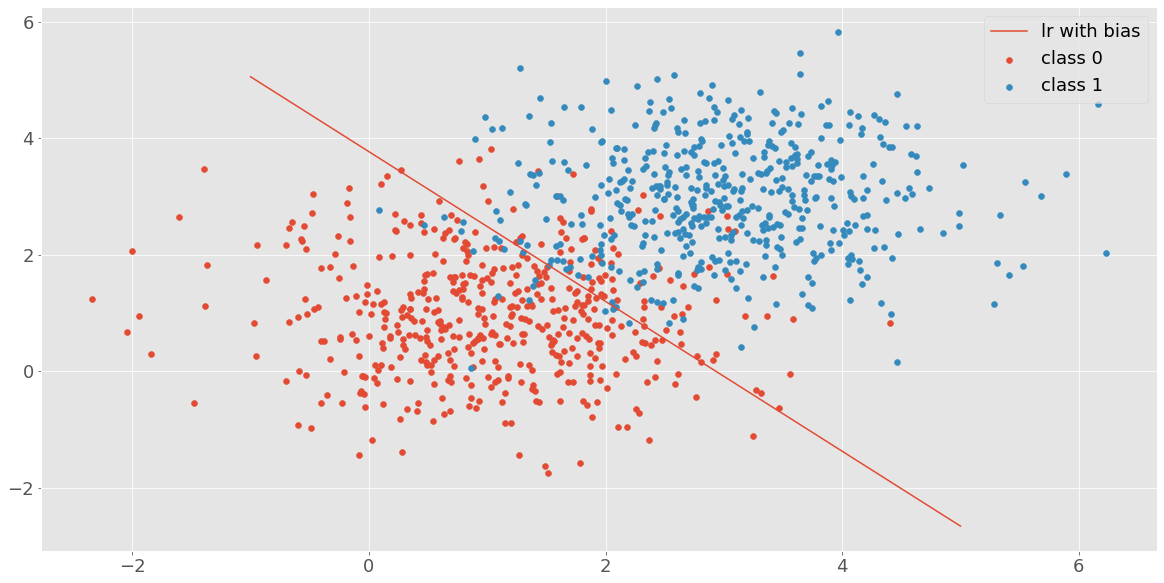

In [119]:
boundaries = model.W1.parameters()
W, b = list(boundaries)
_W = W.new(2, 3)
_W[:,1:] = W.data
_W[:, 0] = b.data
w = _W[0, :] - _W[1, :]
w = w.cpu().numpy()

_ = visualize_datapoints(first, second, boundaries=[(w, 'lr with bias')])